In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg

In [73]:
#Importar los datos
df=pd.read_csv('rendimientoEstudiantes.csv')

In [76]:
#Ejemplos de registros
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [75]:
#Detección de valores nulos
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Análisis descriptivo

In [74]:
#información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [77]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# T de Student (Dos muestras independientes)

In [71]:
#Nivel de significancia
alfa=0.05

#Muestra de 25 y 20 valores
df_nn=df[(df['test preparation course']=='none')]['math score'].sample(25)
df_cpl=df[(df['test preparation course']=='completed')]['math score'].sample(20)


#Verificar distribucion normal de los datos
# Prueba de Shapiro-Wilk
stat_nn, p_nn = shapiro(df_nn)
stat_cpl, p_cpl = shapiro(df_cpl)
if (p_nn > alfa) & (p_cpl>alfa):
   print('Las muestras tienen una distribución Normal')
else:
   print('Las muestras no tienen una distribución Normal')

#Verificar que las varianzas sean homogéneas
#Prueba de Levene
st_let, p_let=stats.levene (df_nn, df_cpl)
if p_let>alfa:
   print('Las muestras tienen varianzas homogéneas')
else:
   print('Las muestras no tienen varianzas homogéneas')


Las muestras tienen una distribución Normal
Las muestras tienen varianzas homogéneas


In [ ]:
#Calcular promedios
mean_nn=np.mean(df_nn)
mean_cpl=np.mean(df_cpl)

#numero de valores
n1=25
n2=20

#Calculo de las varianzas
var_nn=np.var(df_nn)
var_cpl=np.var(df_cpl)
  
#Calculo de varianza común
var_c=( (n1-1)*var_nn + (n2-1)*var_cpl)/(n1+n2-2)

#Estadístico de prueba (t-student)
t = (mean_nn - mean_cpl)/np.sqrt( (var_c/n1) + (var_c/n2)   )

#grados de libertad
gl=n1+n2-2

Las muestras tienen varianzas homogéneas


Resultados

In [ ]:
print(f"Nivel de significancia: {alfa}\nGrado de libertad: {gl}\nValor crítico:1.6811\nt: {t}")

Nivel de significancia: 0.05
Grado de libertad: 43
Valor crítico:1.6811
t: -2.317242593624879


# Prueba ANOVA de una vía (Análisis de varianza de una vía)

In [ ]:
#Muestra de los datos
REHigh=df[df['parental level of education']=='high school']['reading score'].sample(frac=0.099)
RECollege=df[df['parental level of education']=='some college']['reading score'].sample(frac=0.099)
REMaster=df[df['parental level of education']=="master's degree"]['reading score'].sample(frac=0.099)

#Verificar distribucion normal de los datos
# Prueba de Shapiro-Wilk
stat_reh, p_reh = shapiro(REHigh)
stat_rec, p_rec = shapiro(RECollege)
stat_rem, p_rem = shapiro(REMaster)

if (p_reh > alfa) & (p_rec >alfa) & (p_rem > alfa):
   print('Las muestras tienen una distribución Normal')
else:
   print('Las muestras no tienen una distribución Normal')

#Verificar que las varianzas sean homogéneas
#Prueba de Levene
st_le, p_le=stats.levene (REHigh, RECollege,REMaster)
if p_le>alfa:
   print('Las muestras tienen varianzas homogéneas')
else:
   print('Las muestras no tienen varianzas homogéneas')

Las muestras tienen una distribución Normal
Las muestras tienen varianzas homogéneas


In [ ]:
#Calculo de ANOVA de una vía
stat_anova1, p_anova1 = stats.f_oneway(REHigh, RECollege, REMaster)
if p_anova1>alfa:
   print(f'P-valor: {p_anova1}, -> se aprueba hipótesis nula')
else:
   print(f'P-valor: {p_anova1}, -> se aprueba hipótesis alternativa')

P-valor: 0.19983943366631013, -> se aprueba hipótesis nula


# Prueba ANOVA dos vías

In [ ]:
#Muestra de los datos
df_anova2=df[['gender','race/ethnicity' ,'writing score']].sample(frac=0.099)
df_anova2.columns = ['gender', 'race_ethnicity', 'writing_score']

#Verificar distribucion normal de los datos
# Prueba de Shapiro-Wilk
stat_ws, p_ws = shapiro(df_anova2['writing_score'])

if p_ws > alfa:
   print('Las muestras tienen una distribución Normal')
else:
   print('Las muestras no tienen una distribución Normal')

Las muestras tienen una distribución Normal


In [ ]:
#Calculo de ANOVA de dos vías
formula = 'writing_score ~ race_ethnicity + gender + gender:race_ethnicity'

model = sm.formula.ols(formula, data= df_anova2).fit()
anova2_table =  sm.stats.anova_lm(model,typ=2)
anova2_table

,sum_sq,df,F,PR(>F)
race_ethnicity,816.559839,4.0,0.849085,0.497877
gender,1119.909737,1.0,4.658073,0.033600
gender:race_ethnicity,369.643460,4.0,0.384367,0.819293
Residual,21397.682498,89.0,NaN,NaN


#R de PEARSON

In [ ]:
#Muestra de los datos
df_pearson=df.sample(frac=0.15)
rs=df_pearson['reading score']
ms=df_pearson['math score']

#Verificar distribucion normal de los datos
# Prueba de Shapiro-Wilk
stat_rs, p_rs = shapiro(rs)
stat_ms, p_ms = shapiro(ms)

if (p_rs > alfa) & (p_ms >alfa):
   print('Las muestras tienen una distribución Normal')
else:
   print('Las muestras no tienen una distribución Normal')

Las muestras tienen una distribución Normal


<AxesSubplot:title={'center':'PEARSON'}>

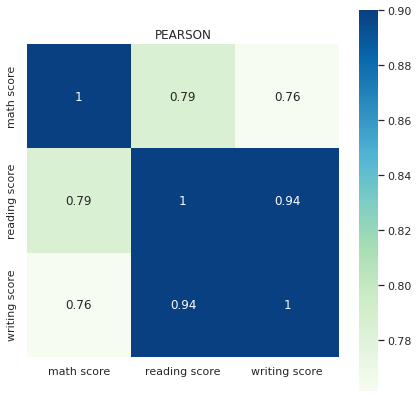

In [ ]:
#Análisis de Pearson
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(7,7))
plt.title("PEARSON")
sns.heatmap(df_pearson.corr(method='pearson'), vmax=0.9,cmap="GnBu", square=True, linecolor='b', annot=True )

In [ ]:
#Valor de correlacion r y p-value
corr=pg.pairwise_corr(df_pearson, method='pearson')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
2,reading score,writing score,150,0.936314,3.797252e-69
0,math score,reading score,150,0.785174,1.312510e-32
1,math score,writing score,150,0.761690,1.095249e-29


# Chi Cuadrado

In [ ]:
#Seleccionar datos
a=len(df[(df['gender'] == 'female') & (df['test preparation course'] == "none")])
b=len(df[(df['gender'] == 'female') & (df['test preparation course'] == "completed")])
c=len(df[(df['gender'] == "male") & (df['test preparation course'] == "none")])
d=len(df[(df['gender'] == "male") & (df['test preparation course'] == "completed")])

#Tabla de referencias cruzadas
df_cc = pd.DataFrame()
# creamos las columnas
df_cc['none'] = None
df_cc['completed'] = None

# añadimos filas 
df_cc.loc['female'] = [a, b]
df_cc.loc["male"] = [c, d]
df_cc

,none,completed
female,334,184
male,308,174


In [ ]:
data_cc = np.array([[a,b], [c,d]])
#Calculo de chi - cuadrado
result_cc = stats.chi2_contingency(data_cc)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%result_cc)

chisq-statistic=0.0155, p-value=0.9008, df=1 expected_frep=[[332.556 185.444]
 [309.444 172.556]]


# Spearman

In [68]:
#Muestra de los datos
df_spearman=df.sample(frac=0.1)
ws_sp=df_spearman['writing score']
ms_sp=df_spearman['math score']

#Verificar distribucion normal de los datos
# Prueba de Shapiro-Wilk
stat_ws_sp, p_ws_sp = shapiro(ws_sp)
stat_ms_sp, p_ms_sp = shapiro(ms_sp)

if (p_ws_sp > alfa) & (p_ms_sp >alfa):
   print('Las muestras tienen una distribución Normal')
else:
   print('Las muestras no tienen una distribución Normal')

Las muestras no tienen una distribución Normal


<AxesSubplot:title={'center':'SPEARMAN'}>

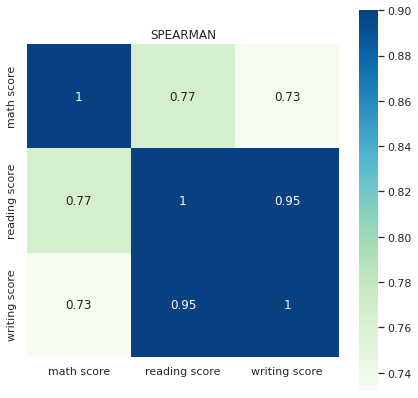

In [69]:
#Análisis de Spearman
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(7,7))
plt.title("SPEARMAN")
sns.heatmap(df_spearman.corr(method='spearman'), vmax=0.9,cmap="GnBu", square=True, linecolor='b', annot=True )

In [70]:
#Valor de correlacion rho y p-value
corr=pg.pairwise_corr(df_spearman, method='spearman')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
2,reading score,writing score,100,0.946580,5.758659e-50
0,math score,reading score,100,0.765813,1.686391e-20
1,math score,writing score,100,0.731984,5.076048e-18
